In [1]:
import numpy as np
import crispr_assembler as ca
import matplotlib.pyplot as plt
import editdistance as ed
import os
import pickle


%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def restore(path, minimum_occurences = 0):
    read = ca.Read(path)
    read.correct_errors(minimum_occurences = minimum_occurences)
    gr = read.graph_from_pairs()[0]

    return read, gr

In [4]:
res,gr = restore("../../new_ecoli.txt", 0) 

100%|██████████| 207/207 [00:00<00:00, 3146.21it/s]


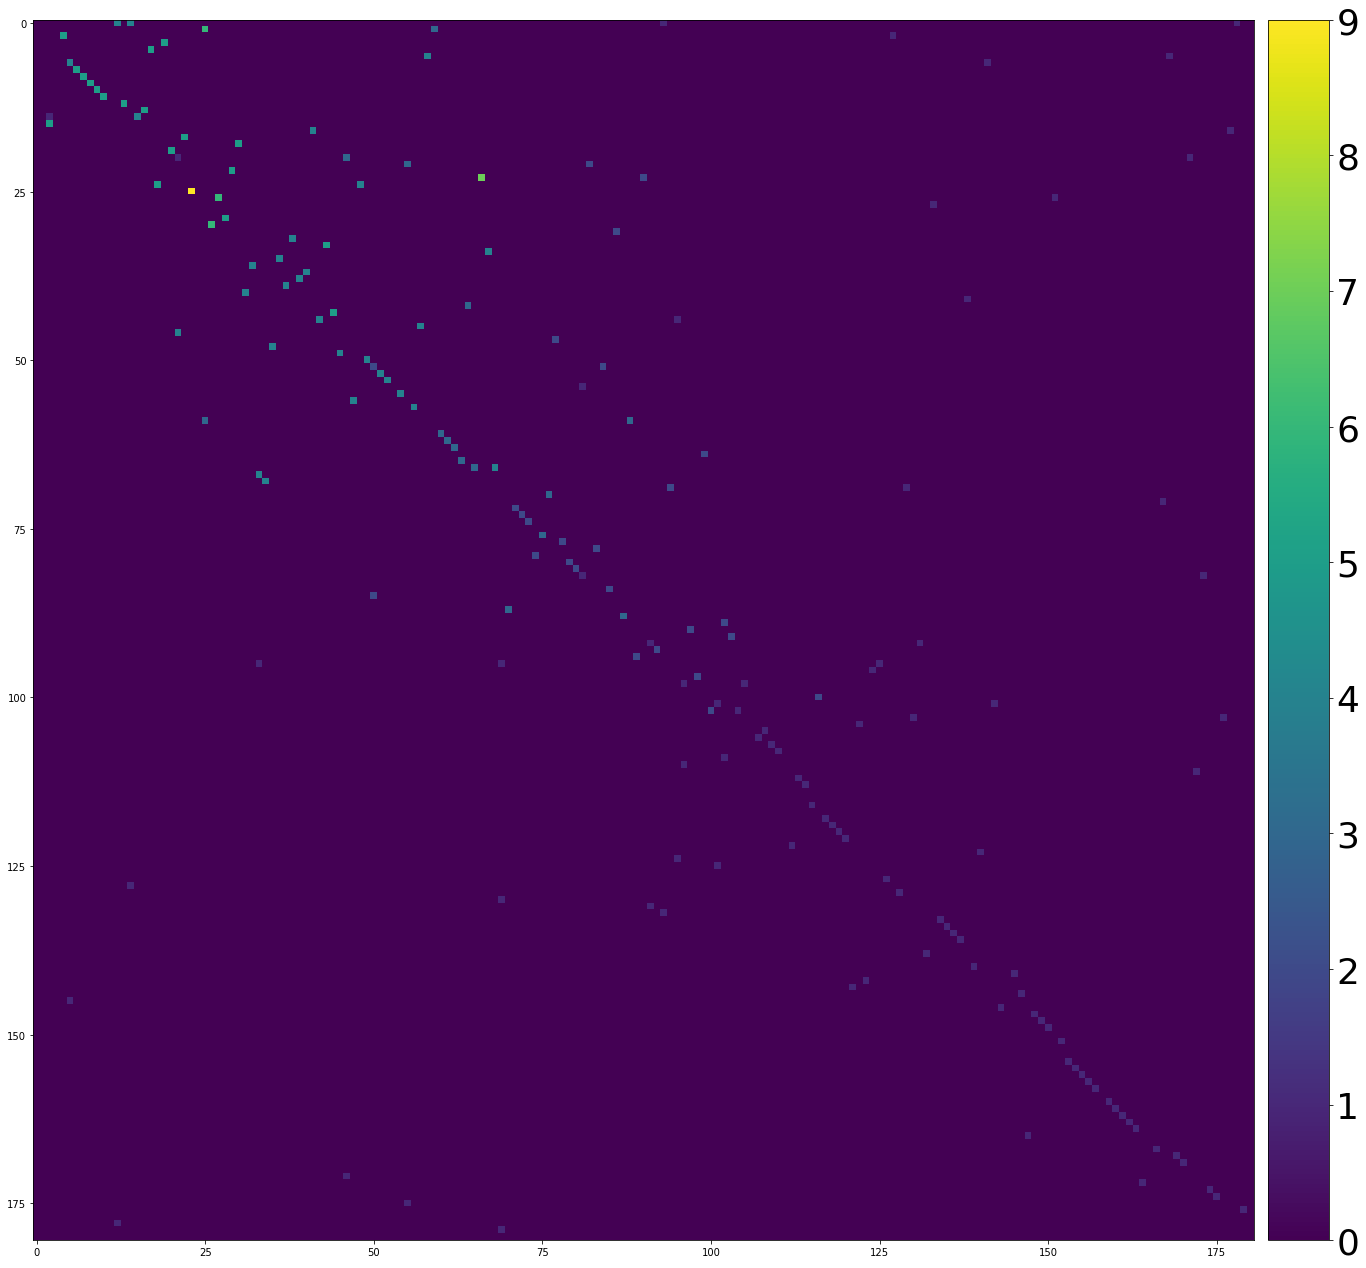

In [5]:
ca.plot_gr(gr)

In [6]:
a = ca.read_arrays_with_tags("../../article/data/answers/all", 0)

In [7]:
a, d = ca.multiple_arrays_to_ids(a, res.spacer_to_cluster_index)

100%|██████████| 54/54 [00:00<00:00, 180.12it/s]


In [8]:
np.unique([x for x in a.values()])

array([list([0, 12, 13, 16, 41]),
       list([0, 12, 13, 16, 41, 138, 132, 93, 92, 131, 91, 103, 130, 69, 129, 128, 14, 2, 127, 126]),
       list([0, 14, 15, 2, 4, 17, 22, 29, 28]),
       list([0, 93, 92, 91, 103, 176, 179, 69, 94, 89, 102, 100, 116]),
       list([0, 178, 12, 13, 16, 177]),
       list([1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42]),
       list([1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42, 64]),
       list([1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42, 64, 99]),
       list([1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 95, 33, 43, 44, 42, 64, 99]),
       list([1, 25, 23, 90, 97, 98, 96]),
       list([1, 25, 23, 90, 97, 98, 105, 108, 110, 96, 124, 95, 125, 101, 101, 142, 123, 140, 139]),
       list([1, 59, 25, 23, 66, 65, 63, 62, 61, 60]),
       list([3, 19, 20, 21, 82, 81, 80, 79, 74, 73, 72, 71, 167, 166]),
       list([3, 19, 20, 46, 21, 55, 54]),
       list([3, 19, 20, 171, 46, 21, 82, 173, 174, 175, 55, 54, 81, 80, 79, 74, 73, 72, 71]),
       list([11, 10, 9, 8, 7, 6

In [78]:
for x in [list([0, 12, 13, 16, 41]),
       list([0, 12, 13, 16, 41, 138, 132, 93, 92, 131, 91, 103, 130, 69, 129, 128, 14, 2, 127, 126]),
       list([0, 14, 15, 2, 4, 17, 22, 29, 28]),
       list([0, 93, 92, 91, 103, 176, 179, 69, 94, 89, 102, 100, 116]),
       list([0, 178, 12, 13, 16, 177])]:

    
    for y in ar[tuple(x)]:
        print(y)
        print(get(a, y.split("_")[1]))

second_1
first_1 [3, 19, 20, 46, 21, 55, 54]
first_11 [3, 19, 20, 46, 21, 55, 54]
first_61 [24, 18, 30, 26, 27]
first_14 [11, 10, 9, 8, 7, 6, 141, 145, 5, 168, 169, 170]
first_15 [3, 19, 20, 171, 46, 21, 82, 173, 174, 175, 55, 54, 81, 80, 79, 74, 73, 72, 71]
first_19 [11, 10, 9, 8, 7, 6, 5, 58]
first_31 [11, 10, 9, 8, 7, 6, 5, 58]
first_21 [24, 48, 35, 36, 32, 38, 39, 37, 40, 31, 86]
first_12 [30, 26, 151, 152]
second_1 [0, 12, 13, 16, 41]
second_61 [0, 14, 15, 2, 4, 17, 22, 29, 28]
second_21 [1, 59, 25, 23, 66, 65, 63, 62, 61, 60]
second_11 [0, 12, 13, 16, 41]
second_14 [0, 93, 92, 91, 103, 176, 179, 69, 94, 89, 102, 100, 116]
second_15 [0, 178, 12, 13, 16, 177]
second_19 [1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42]
second_31 [1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42, 64]
second_12 [0, 12, 13, 16, 41, 138, 132, 93, 92, 131, 91, 103, 130, 69, 129, 128, 14, 2, 127, 126]
None
second_11
first_11 [3, 19, 20, 46, 21, 55, 54]
second_11 [0, 12, 13, 16, 41]
None
second_67
first_67 [3, 19, 20, 

In [9]:
def get_equal_start(a, b):
    i = 0
    res = []
    while i < len(a) and i < len(b) and a[i] == b[i]:
        res.append(a[i])
        i+=1
    return res

In [83]:

keys_sorted = sorted(a.keys())
table = np.zeros((len(a.keys()), len(a.keys()))).astype(int)

for i in range(len(keys_sorted)):
    for j in range(len(keys_sorted)):
#         if len(get_equal_start(a[keys_sorted[i]], a[keys_sorted[j]])) > 0 :
#             print(i, j, keys_sorted[i], keys_sorted[j], len(get_equal_start(a[keys_sorted[i]], a[keys_sorted[j]])))
        table[i, j] = len(get_equal_start(a[keys_sorted[i]], a[keys_sorted[j]]))
        

In [84]:
table[:cut, :cut]

array([[ 7,  7,  0,  0,  3],
       [ 7,  7,  0,  0,  3],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 3,  3,  0,  0, 19]])

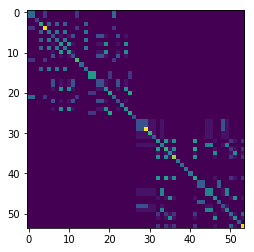

In [82]:
plt.imshow(table)

In [91]:
table2 = np.stack((table[:len(a.keys()) // 2, :len(a.keys()) // 2], table[len(a.keys()) // 2:, len(a.keys()) // 2:]), -1)

In [92]:
table2[:cut, :cut, 0]

array([[ 7,  7,  0,  0,  3],
       [ 7,  7,  0,  0,  3],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 3,  3,  0,  0, 19]])

In [93]:
np.where(table2[:,:, 0] == table2[:,:,1])

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 

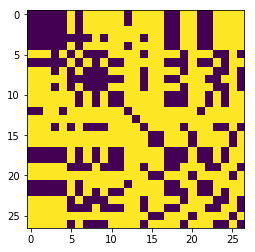

In [94]:
plt.imshow((table2[:,:, 0] == table2[:,:,1]).astype(int))


In [112]:
cut = 5
x_idx, y_idx = np.where(np.logical_and(np.logical_and(table2[:, :, 0] > 0, table2[:, :, 0] < 5)
                                       ,np.logical_and(table2[:, :, 1] > 0, table2[:, :, 1] < 5)))

In [117]:
cut = 5
x_idx, y_idx = np.where(np.logical_and(table2[:, :, 0] > 0, table2[:, :, 0] < 5))
                                       

In [113]:
x_idx

array([ 0,  1,  4,  4,  4, 21])

In [105]:
table2.shape

(27, 27, 2)

In [106]:
(table2[:, :, 0] == table2[:, :, 1]).sum(1)

array([16, 16, 17, 13, 16, 17, 12, 17, 14, 17, 18, 18, 22, 26, 17, 23, 23,
       12, 12, 15, 23, 16, 12, 18, 15, 23, 18])

In [107]:
table2[:cut, :cut, 1]

array([[ 5,  5,  5,  1,  1],
       [ 5,  5,  5,  1,  1],
       [ 5,  5, 20,  1,  1],
       [ 1,  1,  1, 13,  1],
       [ 1,  1,  1,  1,  6]])

In [108]:
[a[keys_sorted[x]] for x in x_idx]

[[3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [3, 19, 20, 46, 21, 55, 54],
 [30, 26, 151, 152],
 [11, 10, 9, 8, 7, 6, 141, 145, 5, 168, 169, 170],
 [3,
  19,
  20,
  171,
  46,
  21,
  82,
  173,
  174,
  175,
  55,
  54,
  81,
  80,
  79,
  74,
  73,
  72,
  71],
 [3,
  19,
  20,
  171,
  46,
  21,
  82,
  173,
  174,
  175,
  55,
  54,
  81,
  80,
  79,
  74,
  73,
  72,
  71],
 [3,
  19,
  20,
  171,
  46,
  21,
  82,
  173,
  174,
  175,
  55,
  54,
  81,
  80,
  79,
  74,
  73,
  72,
  71],
 [3,
  19,
  20,
  171,
  46,
  21,
  82,
  173,
  174,
  175,
  55,
  54,
  81,
  80,
  79,
  74,
  73,
  72,
  71],
 [11, 10, 9, 8, 7, 6, 5, 58],
 [11, 10, 9, 8, 7, 6, 5, 58],
 [11, 10, 9, 8, 7, 6, 5, 58],
 [11, 10, 9, 8, 7, 6, 5, 58],
 [24, 18, 30, 26, 27],
 [24, 18, 30, 26, 27],
 [24, 18, 30, 26, 27],
 [24, 18, 30, 26, 27],
 [11

In [118]:
for x, y in zip(x_idx, y_idx):
    print(keys_sorted[x], keys_sorted[y])# + len(keys_sorted) // 2])
    print(a[keys_sorted[x]], a[keys_sorted[y]])# + len(keys_sorted) // 2]])
    print(a[keys_sorted[x + len(keys_sorted) // 2]], a[keys_sorted[y + len(keys_sorted) // 2]])# + len(keys_sorted) // 2]])

first_1 first_15
[3, 19, 20, 46, 21, 55, 54] [3, 19, 20, 171, 46, 21, 82, 173, 174, 175, 55, 54, 81, 80, 79, 74, 73, 72, 71]
[0, 12, 13, 16, 41] [0, 178, 12, 13, 16, 177]
first_1 first_27
[3, 19, 20, 46, 21, 55, 54] [3, 19, 20, 21, 82, 81, 80, 79, 74, 73, 72, 71, 167, 166]
[0, 12, 13, 16, 41] [95, 69, 94, 89, 102, 100, 116, 115]
first_11 first_15
[3, 19, 20, 46, 21, 55, 54] [3, 19, 20, 171, 46, 21, 82, 173, 174, 175, 55, 54, 81, 80, 79, 74, 73, 72, 71]
[0, 12, 13, 16, 41] [0, 178, 12, 13, 16, 177]
first_11 first_27
[3, 19, 20, 46, 21, 55, 54] [3, 19, 20, 21, 82, 81, 80, 79, 74, 73, 72, 71, 167, 166]
[0, 12, 13, 16, 41] [95, 69, 94, 89, 102, 100, 116, 115]
first_12 first_12
[30, 26, 151, 152] [30, 26, 151, 152]
[0, 12, 13, 16, 41, 138, 132, 93, 92, 131, 91, 103, 130, 69, 129, 128, 14, 2, 127, 126] [0, 12, 13, 16, 41, 138, 132, 93, 92, 131, 91, 103, 130, 69, 129, 128, 14, 2, 127, 126]
first_15 first_1
[3, 19, 20, 171, 46, 21, 82, 173, 174, 175, 55, 54, 81, 80, 79, 74, 73, 72, 71] [3, 19,

In [120]:
get(a, '8')

first_68 [24, 18, 30, 26, 27]
first_8 [53, 52, 51, 50, 49, 45, 57, 56, 47, 77, 78, 83]
second_68 [0, 14, 15, 2, 4, 17, 22, 29, 28]
second_8 [158, 157, 156, 155, 154, 153]


In [121]:
get(a, '5')

first_5 [53, 52, 51, 84, 85, 50, 49, 45, 57, 56, 47]
first_50 [53, 52, 51, 84, 85, 50, 49, 45, 57, 56, 47]
first_15 [3, 19, 20, 171, 46, 21, 82, 173, 174, 175, 55, 54, 81, 80, 79, 74, 73, 72, 71]
first_65 [24, 48, 35, 36, 32, 38, 39, 37, 40, 31]
second_5 [59, 88, 87, 70, 76, 75]
second_50 [59, 88, 87, 70, 76, 75]
second_65 [1, 59, 25, 23, 66, 65, 63, 62, 61, 60]
second_15 [0, 178, 12, 13, 16, 177]


In [123]:
get(a, '60')

In [62]:
ar[(1, 59, 25, 23, 66, 65, 63, 62, 61, 60)]

['second_21', 'second_65', 'second_70']

In [64]:
ar[(1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42, 64, 99)]

['second_20']

In [67]:
get(a, '_20')
print("\n")
get(a, '_70')

first_20 [11, 10, 9, 8, 7, 6, 5, 58]
second_20 [1, 25, 23, 66, 68, 34, 67, 33, 43, 44, 42, 64, 99]


first_70 [24, 48, 35, 36, 32, 38, 39, 37, 40, 31]
second_70 [1, 59, 25, 23, 66, 65, 63, 62, 61, 60]


In [57]:
get(a, '_67')
get(a, '_27')


first_67 [3, 19, 20, 46, 21, 55, 54]
second_67 [0, 12, 13, 16, 41]
first_27 [3, 19, 20, 21, 82, 81, 80, 79, 74, 73, 72, 71, 167, 166]
second_27 [95, 69, 94, 89, 102, 100, 116, 115]


In [29]:
ar = {}
for k,v in a.items():
    v = tuple(v)
    if v in ar:
        ar[v].append(k)
    else:
        ar[v] = [k]

In [21]:
def get(a, key_part):
    for k,v in a.items():
        if key_part in k:
            print (k, v)

In [22]:
def print_sorted(a):
    for k,v in a.items():
        print(k, v)
        print('second_' + k.split("_")[1], a['second_' + k.split("_")[1]])

In [89]:

keys_sorted = np.array(sorted(a.keys()))
keys_first = keys_sorted[np.array(['first' in x for x in keys_sorted])]
keys_second = keys_sorted[np.array(['second' in x for x in keys_sorted])]

table_fs = np.zeros((len(a.keys()), len(a.keys()))).astype(int)

for i in range(len(keys_first)):
    for j in range(len(keys_second)):
        if len(get_equal_start(a[keys_sorted[i]], a[keys_sorted[j]])) > 0 :
            print(i, j, keys_sorted[i], keys_sorted[j], len(get_equal_start(a[keys_sorted[i]], a[keys_sorted[j]])))
        table_fs[i, j] = len(get_equal_start(a[keys_first[i]], a[keys_second[j]]))
        

0 0 first_1 first_1 7
0 1 first_1 first_11 7
0 4 first_1 first_15 3
0 12 first_1 first_27 3
0 21 first_1 first_67 7
1 0 first_11 first_1 7
1 1 first_11 first_11 7
1 4 first_11 first_15 3
1 12 first_11 first_27 3
1 21 first_11 first_67 7
2 2 first_12 first_12 4
3 3 first_14 first_14 12
3 5 first_14 first_19 6
3 7 first_14 first_20 6
3 9 first_14 first_22 6
3 14 first_14 first_31 6
4 0 first_15 first_1 3
4 1 first_15 first_11 3
4 4 first_15 first_15 19
4 12 first_15 first_27 3
4 21 first_15 first_67 3
5 3 first_19 first_14 6
5 5 first_19 first_19 8
5 7 first_19 first_20 8
5 9 first_19 first_22 8
5 14 first_19 first_31 8
6 6 first_2 first_2 5
6 8 first_2 first_21 1
6 10 first_2 first_23 1
6 11 first_2 first_24 5
6 17 first_2 first_61 5
6 18 first_2 first_62 5
6 19 first_2 first_65 1
6 22 first_2 first_68 5
6 24 first_2 first_70 1
7 3 first_20 first_14 6
7 5 first_20 first_19 8
7 7 first_20 first_20 8
7 9 first_20 first_22 8
7 14 first_20 first_31 8
8 6 first_21 first_2 1
8 8 first_21 firs

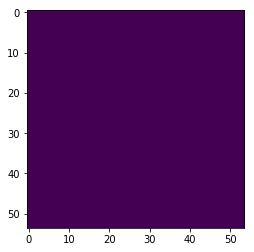

In [90]:
plt.imshow(table_fs)